In [ ]:
# Assignment: Exploring GANs with Pretrained Models
# By: Harsh Chavva

In [ ]:
!pip install torch torchvision
!pip install git+https://github.com/torch/torch7
!pip install matplotlib

!pip install torch torchvision pillow pytorch-pretrained-biggan matplotlib
# Install and prepare NLTK WordNet data
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: for multilingual WordNet support

# 1. Imports
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample, save_as_images)
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


100%|██████████| 715/715 [00:00<00:00, 1956247.46B/s]


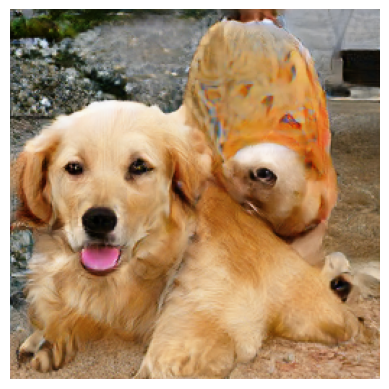

In [ ]:
# 2. Load pretrained BigGAN model
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

# 3. Generate noise and class vectors
truncation = 0.4
class_vector = one_hot_from_names(['golden retriever'], batch_size = 1)
noise_vector = truncated_noise_sample(truncation = truncation, batch_size = 1)

# Convert to torch.Tensor
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Tweak the latent vector here
#noise_vector[0][10] += 0.5 # Add a small value to dimension 10

# 4. Generate image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# 5. Convert to displayable format
img = output[0].cpu().numpy()
img = np.transpose(img, (1, 2, 0))
img = (img + 1) / 2  # Scale from [-1,1] to [0,1]
img = (img * 255).astype(np.uint8)
image = Image.fromarray(img)

# 6. Show the image with matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

# 4. Analyze the Generated Images

### What characteristics do you notice in the generated images?
- The most noticeable characteristic is **image consistency**:
  - The generated images resemble real photographs, though key facial features (like the eyes, nose, and mouth) appear slightly blurred
    - This blurriness is common in GAN outputs and often results from the model averaging similar features across training examples
  - Both images share a similar style, likely due to using the same truncation value (0.4) and class label
  - The backgrounds are indistinct or generic, which reflects a known limitation of GANs: difficulty modeling peripheral areas or fine-grained background details
    - This is especially noticeable at lower truncation values, where diversity is reduced

### Are they realistic? Are there any artifacts or distortions?
- Overall, the images look fairly realistic, but minor flaws make it easy to recognize that they are AI-generated
- **Realism highlights**:
  - The dogs have convincing fur textures, realistic lighting, and well-proportioned facial structures
  - Reflections in the eyes and shading on the noses mimic real photography
- **Artifacts**:
  - Slight smearing or blurry patches appear near the neck and ears, particularly in the first image
- **Distortions**:
  - The paws resemble nubs of fur rather than clearly defined limbs
  - In some cases, proportions of the body look off compared to the rest of the image
  - Backgrounds are often soft-focused or distorted, depending on the image